# The Goal:
  ## understand what linear regression, logistic refgresion, and knn areas techniques and where they can be used
# The Project:
  ## Pick dataset that can train a model that uses one of these techniques, then well. make the model
  

# what is linear regression?

In [ ]:
!pip -q install pandas numpy scikit-learn matplotlib 

In [ ]:
# linear regression is a technique that can predict output given an input like a funtion. 
# it is good for predicting relationships that are at least kind of linear
# handy for showing correlation (does not always mean causation)


# The goal is to predict a students score in their class based on their alchahol consunption
# this code is as generated from chatgpt given the prompt: (wright me a simple python sample code to perform a linear regression on some 
# real world data, pick me a simple dataset from kaggle and process it using pandas)
# I had to pick a different dataset because the link was nonexistent and change some other things like what row to read
# I chose https://github.com/sarthak-srivastava/Student-Performance-Dataset
# check how teacher wants to cir chatgpt



import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
CSVLocation = "student performance dataset/student-por.csv" #I found this on kaggle and did a git pull from the working directory of my project
df = pd.read_csv(CSVLocation)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())



Dataset Preview:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]



Model Evaluation:
Mean Squared Error: 9.1445989057723
R-squared: -0.06523105533189888

Comparison of Actual vs Predicted:
     Actual  Predicted
636      17  11.572576
220      11  10.954315
594      18  11.572576
429      10  11.572576
72       13  10.954315


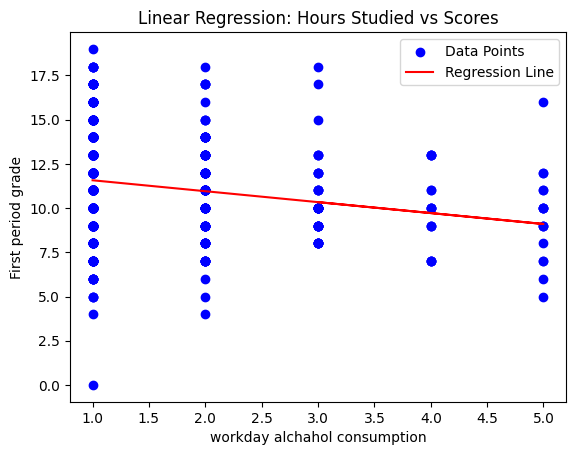

In [4]:

# Feature selection (Hours) and Target variable (Scores)
X = df[['Dalc']]  # Independent variable (workday alchahol consumption)
y = df['G1']   # Dependent variable (first period grade)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display predictions alongside actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nComparison of Actual vs Predicted:")
print(comparison.head())

# Visualize the regression line (optional)
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('workday alchahol consumption')
plt.ylabel('First period grade')
plt.title('Linear Regression: Hours Studied vs Scores')
plt.legend()
plt.show()


# what is logistic regression?

https://en.wikipedia.org/wiki/Logistic_regression

- basically its is for making things  things that arent so linear


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# download the dataset here: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# load cardio dataset
cardio_path = "cardio_train.csv"
data = pd.read_csv(cardio_path, delimiter=';')

#take a look at features of the dataset
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
#select features you want to track

features = ['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
X = data[features]
y = data['cardio']



In [ ]:

# train model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\benlo\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5909285714285715
Confusion Matrix:
 [[4451 2537]
 [3190 3822]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.64      0.61      6988
           1       0.60      0.55      0.57      7012

    accuracy                           0.59     14000
   macro avg       0.59      0.59      0.59     14000
weighted avg       0.59      0.59      0.59     14000

